<a href="https://colab.research.google.com/github/JuniorSteve770/PYTHON/blob/main/Portefeuille_1_Memoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Portefeuille 1**
**Nous allons Utiliser le Model MEDAF(CAPM) pour Analyser les Actifs du CAC40 ci-dessous:**
- BNP Parisbas
- Ste_Generale
- Credit Agricole




In [106]:
# Importation des librairies

import datetime as dt
import yfinance as yf
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np

In [107]:
#******* Premiere Importationde des données*******#

# BNP Paribas(BNP.PA), Société Générale (GLE.PA), Crédit Agricole S.A. (ACA.PA)
# Indice de reference est le CAC40 (^FCHI)

assets = ["BNP.PA","GLE.PA","ACA.PA","^FCHI"]
start = dt.datetime(2023, 5, 15)
end = dt.datetime(2023, 6, 14)
#start = dt.datetime.today() - dt.timedelta(31)
#end = dt.datetime.today()

# Assets correspond aux actifs dont nous souhaitons importer les modalités et paramettres.
# start et end renvoient au nombre de jours de cotation aucour d'un mois tout en excluant les weekends ou la bourse est fermé.  (24 jours du mois en arriere a compter d'hier)
# le choix de 24 correspond a 1 mois de données.

# Boucle pour lire les differentes modalités de chacunes de nos variables ou actifs financier et stocker dans l'objet price
for price in assets:
    price = yf.download(price,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [108]:
# Affichage de la Boucle avec les differentes modalités
price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-15,7443.379883,7455.629883,7397.859863,7418.209961,7418.209961,48638700
2023-05-16,7394.850098,7427.569824,7377.810059,7406.009766,7406.009766,61261800
2023-05-17,7378.830078,7422.580078,7354.540039,7399.439941,7399.439941,57783800
2023-05-18,7440.750000,7481.779785,7426.390137,7446.890137,7446.890137,59991600
2023-05-19,7469.779785,7523.560059,7463.959961,7491.959961,7491.959961,67973200
2023-05-22,7467.930176,7493.379883,7452.689941,7478.160156,7478.160156,57439200
2023-05-23,7457.180176,7459.370117,7378.709961,7378.709961,7378.709961,65786700
2023-05-24,7306.140137,7308.589844,7223.580078,7253.459961,7253.459961,77511200
2023-05-25,7261.049805,7261.049805,7197.399902,7229.270020,7229.270020,59437600


Nous allons maintenant procéder à un petit traitement des données.
Trions les prix de clôture ajustés par tickers :

In [109]:
# Creation et affichage de la Dataframe qui vas stocker les modalités (prix) des differentes variables (actifs)
p_close = pd.DataFrame()

# Boucle qui permet de stoker la modalité Prix de fermeture Ajuster (Adj Close) de tout les differentes variables dans notre dataFrame P_close
for price in assets:
    p_close[price] = yf.download(price,start,end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [110]:
#Affichage des Prix de fermeture Ajuster (Adj Close)
p_close

,BNP.PA,GLE.PA,ACA.PA,^FCHI
Date,,,,
2023-05-15,54.818848,20.677216,10.650352,7418.209961
2023-05-16,54.622532,20.496202,10.695951,7406.009766
2023-05-17,54.809502,20.904642,10.664945,7399.439941
2023-05-18,55.753685,21.327005,10.770737,7446.890137
2023-05-19,55.950001,21.521940,10.825457,7491.959961
2023-05-22,57.310001,21.679747,10.874704,7478.160156
2023-05-23,57.080002,22.524471,10.909360,7378.709961
2023-05-24,56.040001,22.060337,10.785329,7253.459961
2023-05-25,56.180000,22.129957,10.781680,7229.270020


## Traitement de la donnée Collecter


In [111]:
# Affichage de la DataFrame (Head, Tail) Uniquement avec les Prix de clotures des actifs (variables)
p_close.head()

,BNP.PA,GLE.PA,ACA.PA,^FCHI
Date,,,,
2023-05-15,54.818848,20.677216,10.650352,7418.209961
2023-05-16,54.622532,20.496202,10.695951,7406.009766
2023-05-17,54.809502,20.904642,10.664945,7399.439941
2023-05-18,55.753685,21.327005,10.770737,7446.890137
2023-05-19,55.950001,21.521940,10.825457,7491.959961


In [112]:
# Affichage de la DataFrame (Head, Tail) Uniquement avec les Prix de clotures des actifs (variables)
p_close.tail()

# On remarque également que les valeurs du tails de chacunes des variables sont plus élevés par rapports aux valeurs du Head: (il ya croissance)

,BNP.PA,GLE.PA,ACA.PA,^FCHI
Date,,,,
2023-06-06,56.470001,22.605000,10.852,7209.000000
2023-06-07,56.759998,22.610001,10.850,7202.790039
2023-06-08,57.009998,22.875000,10.932,7222.149902
2023-06-09,56.070000,23.325001,10.832,7213.140137
2023-06-12,56.430000,23.305000,10.790,7250.350098


In [113]:
# Estimation de la quantité de valeurs manquantes sur chaques variables de toute la dataframe
p_close.isnull().sum()

# Pas de valeurs Manquantes(NAN) dans notre jeux de Données


BNP.PA    0
GLE.PA    0
ACA.PA    0
^FCHI     0
dtype: int64

In [114]:
# En cas de presence de Valeurs Manquante dans le Jeux de Données Avenir
# Remplacement de ces Valeurs Manquantes (NAN) pourrai se faire suivant l'une des 3 Methodes
# Nous avons 3 méthodes

#----------# remplacer tous les NAN par la premiere valeur non NAN avec la synthaxe:
           #p_close[price].fillna(method='bfill')

#----------# supprimmer les lignes ou colones qui contienent les NAN
           #p_close[price].dropna(axis = 0, how = 'any')

#----------# Remplacer les NAN par zero(0) car il n'aura aucun effet sur les données et calculs.
           # une première synthaxe est : new var = np.where(np.isnan(old_var), 0, old_var)

# CONCATENATION  et affichage de la dataFrame sur lequel nous avons remplacer les NAN par Zero (NAN = 0)
close_p = p_close.fillna(0)
close_p.head()

,BNP.PA,GLE.PA,ACA.PA,^FCHI
Date,,,,
2023-05-15,54.818848,20.677216,10.650352,7418.209961
2023-05-16,54.622532,20.496202,10.695951,7406.009766
2023-05-17,54.809502,20.904642,10.664945,7399.439941
2023-05-18,55.753685,21.327005,10.770737,7446.890137
2023-05-19,55.950001,21.521940,10.825457,7491.959961


In [115]:
#Statistique Descriptive de Notre jeux de Données
close_p.describe()

,BNP.PA,GLE.PA,ACA.PA,^FCHI
count,20.000000,20.000000,20.000000,20.000000
mean,55.970728,22.059824,10.808423,7300.129028
std,0.873224,0.795680,0.087352,110.538892
min,54.009998,20.496202,10.650352,7098.700195
25%,55.637764,21.602984,10.761053,7212.292603
50%,56.084999,22.129957,10.828728,7262.074951
75%,56.472501,22.606250,10.865129,7401.082397
max,57.310001,23.325001,10.954000,7491.959961


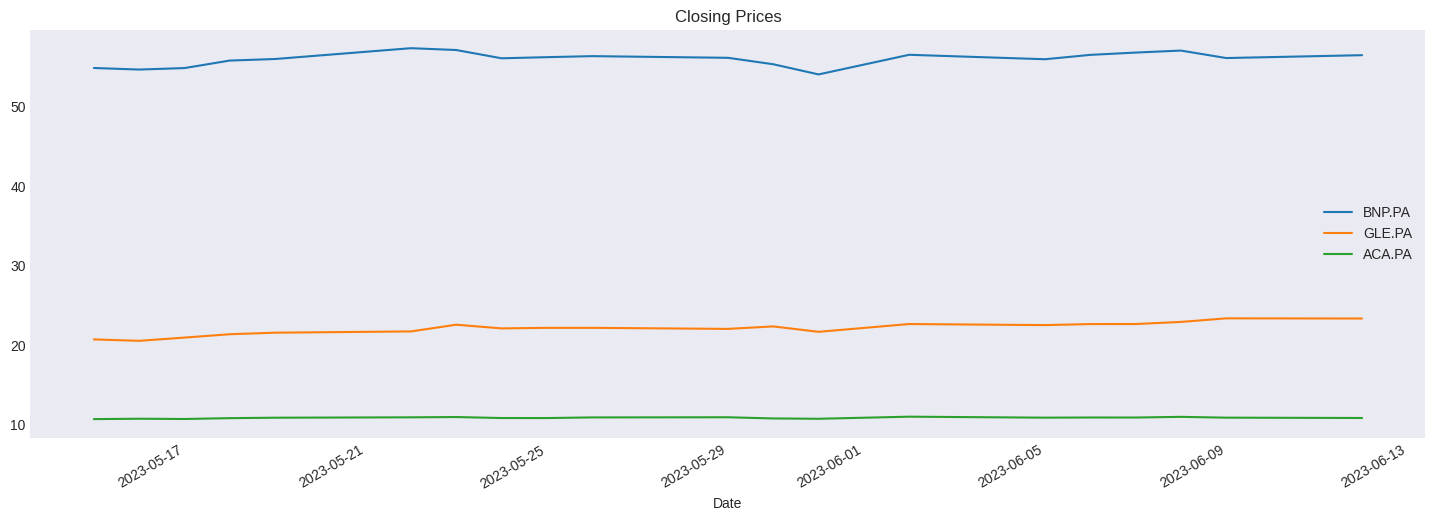

In [116]:
# premier Plot de la Tendance sur lequel nous avons exclu le CAC40

#close_p['^FCHI'].plot(label= '^FCHI', figsize=(18,6), title = 'Closing Prices')
close_p['BNP.PA'].plot(label= 'BNP.PA', figsize=(18,6), title = 'Closing Prices')
close_p['GLE.PA'].plot(label= 'GLE.PA')
close_p['ACA.PA'].plot(label= 'ACA.PA')
plt.legend();

# Une Interprétation du graphique ci-dessus est la suivante :
# tous ces actifs connaissent une faible croissance avec des prix qui évoluent significativement à la hausse.
#-	L’actif avec la plus grande variation et prix est BNP PARIS BAS de couleur Bleu


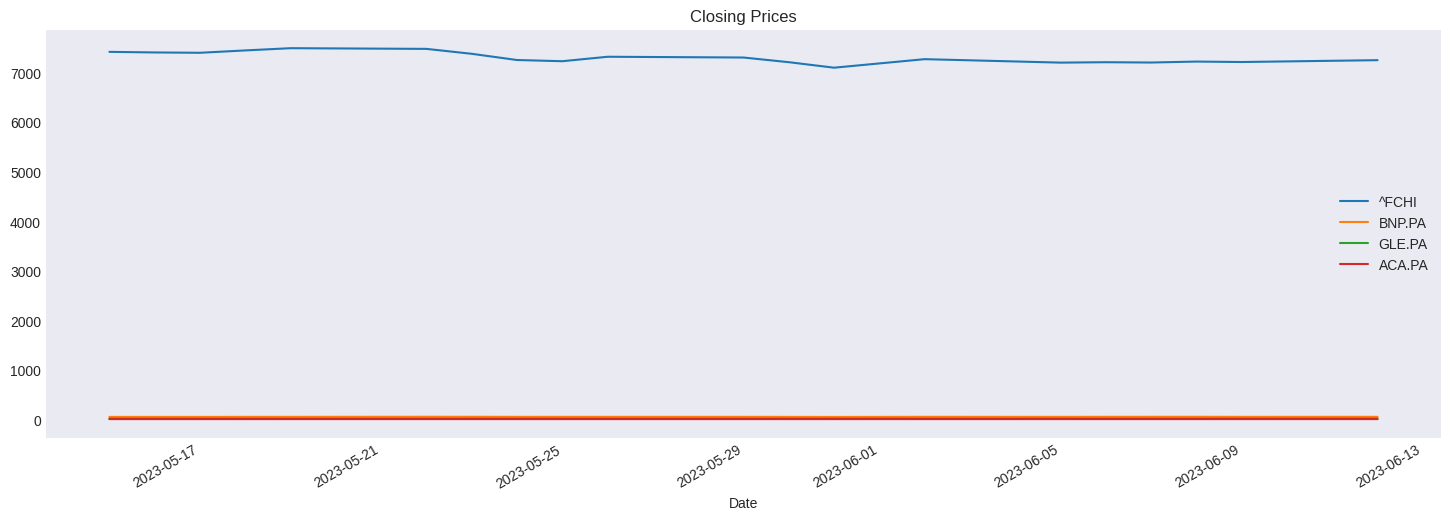

In [117]:
# Deuxieme Plot de la Tendance avec le CAC 40

close_p['^FCHI'].plot(label= '^FCHI', figsize=(18,6), title = 'Closing Prices')
close_p['BNP.PA'].plot(label= 'BNP.PA', figsize=(18,6), title = 'Closing Prices')
close_p['GLE.PA'].plot(label= 'GLE.PA')
close_p['ACA.PA'].plot(label= 'ACA.PA')
plt.legend();

# Une Interprétation du graphique ci-dessus est la suivante :
# on distingue pas assez la nature de nos graphique pour interpreter.
# cela est du a la grande difference de prix entre l'indice (7000) et les autres actif (entre 0 et 100) soit une difference de 6900

ESTIMATION DES RENDEMENTS

In [118]:
# Etapes de Calcul du Rendement Moyen
# cree une coleonne pour le rendement de chaque actif
# utiliser la formule et appliqué la methode shift
# on peut aussi utiliser la fonction "pct.change" de pandas

Return_BNP = (close_p['BNP.PA']/close_p['BNP.PA'].shift(1))-1
Return_Ste_Gen = (close_p['GLE.PA']/close_p['GLE.PA'].shift(1))-1
Return_Cred_Ag = (close_p['ACA.PA']/close_p['ACA.PA'].shift(1))-1
Return_CAC40 = (close_p['^FCHI']/close_p['^FCHI'].shift(1))-1

Return_BNP, Return_Ste_Gen, Return_Cred_Ag , Return_CAC40
# Ce rendement est positif lorque le prix de l’actif coture à la hausse et négatif s’il cloture plutot à la baisse

(Date
 2023-05-15         NaN
 2023-05-16   -0.003581
 2023-05-17    0.003423
 2023-05-18    0.017227
 2023-05-19    0.003521
 2023-05-22    0.024307
 2023-05-23   -0.004013
 2023-05-24   -0.018220
 2023-05-25    0.002498
 2023-05-26    0.002314
 2023-05-29   -0.003729
 2023-05-30   -0.014438
 2023-05-31   -0.023151
 2023-06-02    0.045732
 2023-06-05   -0.009915
 2023-06-06    0.009836
 2023-06-07    0.005135
 2023-06-08    0.004405
 2023-06-09   -0.016488
 2023-06-12    0.006421
 Name: BNP.PA, dtype: float64,
 Date
 2023-05-15         NaN
 2023-05-16   -0.008754
 2023-05-17    0.019928
 2023-05-18    0.020204
 2023-05-19    0.009140
 2023-05-22    0.007332
 2023-05-23    0.038964
 2023-05-24   -0.020606
 2023-05-25    0.003156
 2023-05-26    0.000000
 2023-05-29   -0.005872
 2023-05-30    0.014091
 2023-05-31   -0.030480
 2023-06-02    0.045308
 2023-06-05   -0.005971
 2023-06-06    0.005784
 2023-06-07    0.000221
 2023-06-08    0.011720
 2023-06-09    0.019672
 2023-06-12   -0.0008

In [119]:
## Calcul de la Covariance

cov_BNP = Return_BNP.cov(Return_CAC40)
cov_Ste_Gen = Return_Ste_Gen.cov(Return_CAC40)
cov_Cred_Ag = Return_Cred_Ag.cov(Return_CAC40)

cov_BNP, cov_Ste_Gen, cov_Cred_Ag

(0.00012971193777286952, 8.864357760467969e-05, 7.151759856999629e-05)

In [120]:
## Calcul de la variance du CAC40 (rendement du marché )
var_cac40 = Return_CAC40.var()
var_cac40

0.00010078032895770799

In [121]:
## Calcul du beta de chacun des actifs = cov/variance du marché
B_BNP = cov_BNP/var_cac40
B_Ste_Gen = cov_Ste_Gen/var_cac40
B_Cred_Ag = cov_Cred_Ag/var_cac40

B_BNP , B_Ste_Gen , B_Cred_Ag

(1.2870759513724404, 0.879572219315523, 0.7096384712140434)

In [122]:
# le taux sans risque (Tsr)du moi de juin est de 3,8%(0.038) vas nous servir de référence dans les calculs
# supposons que l'on espere un rendement de 10%, soit Re = 0.1
# Le retour sur investissement selon le CAPM se calcul comme suite:
# Ri = Tsr + beta (Re-Tsr)

Ri_BNP = 0.031 + B_BNP*(0.1 - 0.031)
Ri_Ste_Gen =  0.031 + B_Ste_Gen*(0.1 - 0.031)
Ri_Cred_Ag = 0.031 + B_Cred_Ag*(0.1 - 0.031)

Ri_BNP*100, Ri_Ste_Gen*100, Ri_Cred_Ag*100

(11.98082406446984, 9.16904831327711, 7.996505451376901)

# Interpretation:

Ainsi, le retour sur investissment espéré est de:
*  11,98 %  pour l'action BNP,
*  9.16 %  pour  Societe Generale,
*  7.99 %  pour Credit Agricole.

ETUDE  DE LA VOLATILITE

In [123]:
# Creation de la Dataframe qui vas stocker le volume des differents actifs
p_volatility = pd.DataFrame()

In [124]:
# Boucle qui permet d'enregistrer le volume de chaque actif dans une dataFrame
for price in assets:
    p_volatility[price] = yf.download(price,start,end)["Volume"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [125]:
#Affichage des premieres valeurs
p_volatility.head()

,BNP.PA,GLE.PA,ACA.PA,^FCHI
Date,,,,
2023-05-15,2098800,2544349,5374285,48638700
2023-05-16,2817527,2916189,4946963,61261800
2023-05-17,3034253,3091955,4096275,57783800
2023-05-18,3280289,3781120,5475090,59991600
2023-05-19,4601652,4186614,5465922,67973200


In [126]:
# On Fait une Concatenation tout en remplacant les NAN si elles existent ou surviennent
cl_volatility = p_volatility.fillna(0)

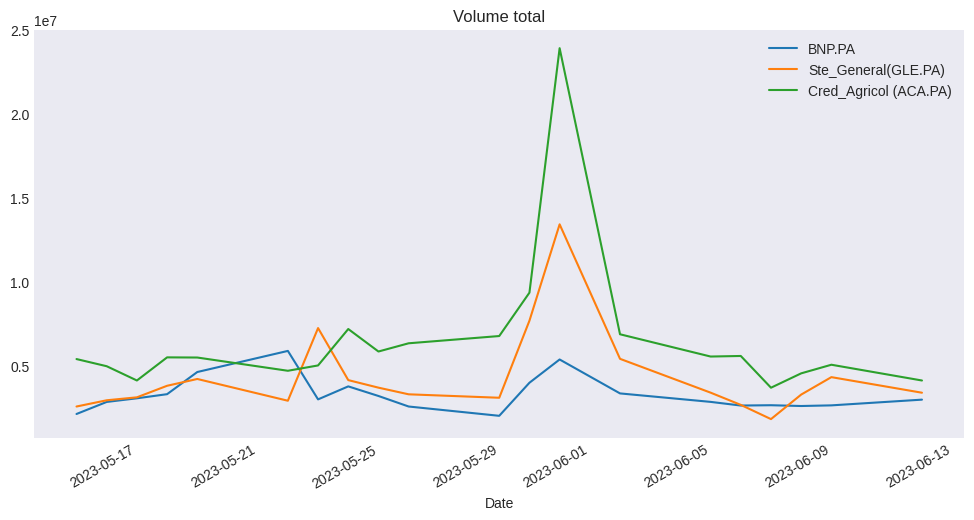

In [127]:
# On plot le volume de tous nos Actifs (Volume total)

cl_volatility['BNP.PA'].plot(label= 'BNP.PA', figsize=(12,6), title = 'Volume total')
cl_volatility['GLE.PA'].plot(label= 'Ste_General(GLE.PA)')
cl_volatility['ACA.PA'].plot(label= 'Cred_Agricol (ACA.PA)')
#cl_volatility['^FCHI'].plot(label= 'CAC40 (^FCHI)')

plt.legend();
# Ce plot de volumetrie nous montre que l'actif Credit Agricole possede de tres grand niveaux de volatilité, suivi par Ste General et enfin BNP


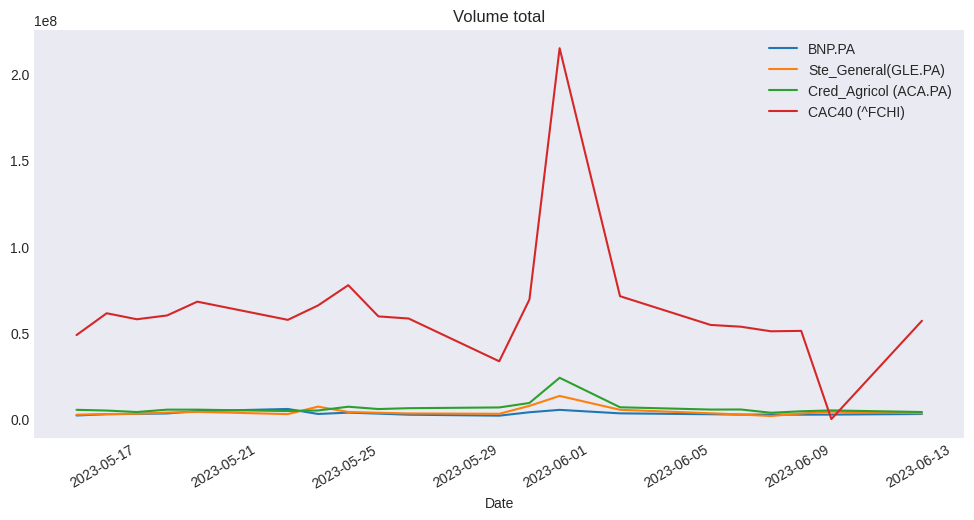

In [128]:
# On plot le volume de tous nos Actifs (Volume total)

cl_volatility['BNP.PA'].plot(label= 'BNP.PA', figsize=(12,6), title = 'Volume total')
cl_volatility['GLE.PA'].plot(label= 'Ste_General(GLE.PA)')
cl_volatility['ACA.PA'].plot(label= 'Cred_Agricol (ACA.PA)')
cl_volatility['^FCHI'].plot(label= 'CAC40 (^FCHI)')

plt.legend();
# Une Interprétation du graphique ci-dessus est la suivante :
# le graphique du CAC40 Domine et on distingue pas assez la nature des autres graphiques pour interpreter.
# cela est du a la grande difference de prix entre l'indice CAC40 et les autres actif

## FRONTIERE EFFICIENTE
Nous allons estimer la frontière efficiente, en faisant une simulation des combinaisons imaginaires de portefeuilles

Nous allons nous limité a 1 000 portefeuilles de combinaisons différentes.

In [129]:
# calcul des Rendements Anuuel et Journalier de notre portefeuille
returns_daily = p_close.pct_change()
returns_annual = returns_daily.mean() * 250

# calcul des Covariances Anuuel et Journalière de notre portefeuille
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [130]:
# lists pour stocquer le Rendement, Volatilité, Poids ou niveau de representation de l'actif dans le portefeuille(weights)

port_returns = []
port_volatility = []
stock_weights = []

# Nombres de Combinaisons de Portefeuille imaginaires
num_assets = len(assets)
num_portfolios = 10000

# Remplissage des Liste defini plus haut avec les valeurs aleatoire de Rendement, Risque et Weight
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [131]:
# Creation d'un dictionnaire pour stocker les valeurs de nos Combinaisons de Portefeuille
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

In [132]:
# Croisement de données entre dictionnaire et les valeurs weight des portefeuilles
for counter,symbol in enumerate(assets):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

In [133]:
# Creation d'une DataFrame a partir des portefeuilles
df = pd.DataFrame(portfolio)

# Definition des Colonnes
column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in assets]

# Reorgatisation des colonnes de notre DataFrame
df = df[column_order]

#Affichage du Head
df.head()

,Returns,Volatility,BNP.PA weight,GLE.PA weight,ACA.PA weight,^FCHI weight
0,0.981442,0.222291,0.285939,0.526598,0.140031,0.047432
1,0.608104,0.201211,0.332175,0.333779,0.059216,0.274831
2,0.586340,0.198850,0.310672,0.331358,0.054790,0.303180
3,0.789768,0.205354,0.081290,0.528542,0.029420,0.360748
4,0.570944,0.188262,0.268035,0.297781,0.221842,0.212342


1 000 portefeuilles avec différentes combinaisons de pondérations ont généré différents rendements attendus et différentes volatilités attendues. Chaque point situé sur la ligne représente une combinaison optimale d'actions (CenterPoint Energy, Facebook, Walmart, General Electric, Tesla dans le cas présent) qui maximise le rendement attendu pour un niveau de risque donné. Si tous les points de la courbe de la frontière efficiente sont des combinaisons optimales, quel est le portefeuille optimal parmi les différentes combinaisons optimales ? Quels seraient même les critères de choix de cette "meilleure des meilleures" combinaisons ?

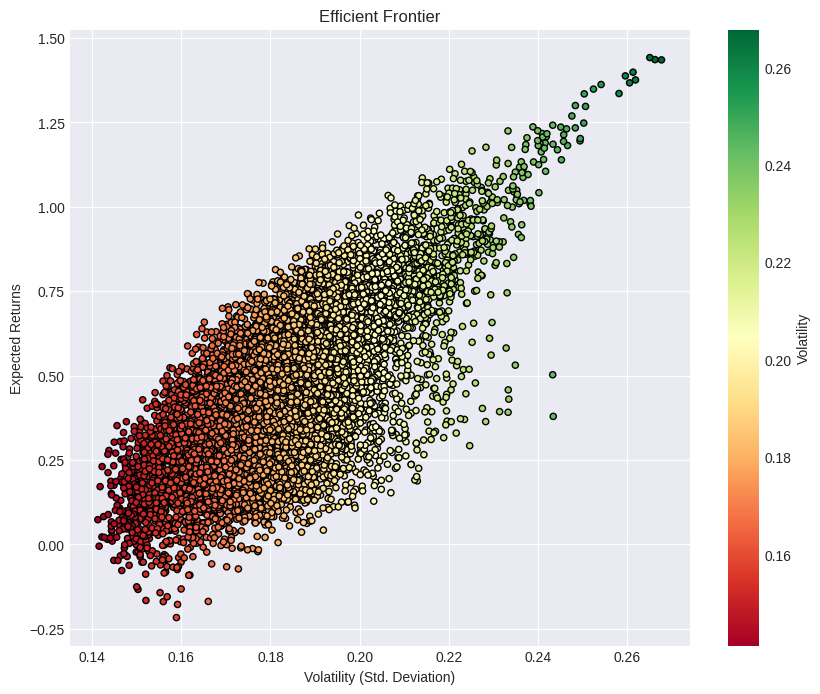

In [134]:
# Affichage du Tracé de la Frontiere Efficiente avec les Valeurs Max et Min en fonction de la Vollatilité
plt.style.use('seaborn-v0_8-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Volatility',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show();

Cet Image nous Montre la simulation de 10.000 portefeuilles avec différentes combinaisons d'actifs ou pondérations qui nous ont généré différents rendements attendus et différentes volatilités attendues. Chaque point situé sur la ligne représente une combinaison optimale d'actions (BNP Paribas('BNP.PA), Ste_General(GLE.PA), Credit Agricol (ACA.PA))

Nous savons que ces actions maximisent le rendement attendu pour un niveau de
risque donné.

> Ce pendant, Si tous les points de la courbe de la frontière efficiente sont des combinaisons optimales, quel est le portefeuille optimal parmi les différentes combinaisons optimales ?

>  Quels seraient même les critères de choix de cette "meilleure des meilleures" combinaisons ?

> Les Reponses a ces questions se trouvent dans le Rapport Final.
